<a href="https://colab.research.google.com/github/NaveenKarunanidhi/Fashion-Prediction/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
pd.read("posts.txt")

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
# tf.enable_eager_execution() # use tf version 2.0

2.2.0-rc2


In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#metadata
#dataset

In [0]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [0]:
dataset

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [0]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # normalize operation
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

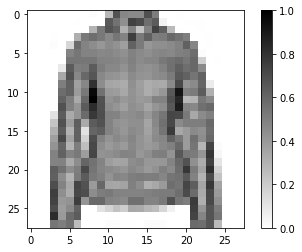

In [0]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
l1 = tf.keras.layers.Flatten(input_shape=(28,28,1))

In [0]:
l2 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)

In [0]:
l3 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

In [0]:
model = tf.keras.Sequential([l1,l2,l3])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4942 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3830 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3316 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3145 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2960 - accuracy: 0.8901


In [0]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.6225 - acc: 0.7689
Accuracy on test dataset: 0.7689


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
predictions.shape
predictions[0]

array([1.0044272e-04, 4.1851155e-05, 1.5300980e-02, 1.2318992e-06,
       9.7504538e-01, 3.1861985e-10, 9.4813723e-03, 2.4564009e-09,
       2.8703784e-05, 3.7176939e-08], dtype=float32)

In [0]:
np.argmax(predictions[0])

4

In [0]:
test_labels[0]

array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 2, 7, 7, 4, 2, 4, 7, 5])

In [0]:
class_names[np.argmax(predictions[0])]

'Coat'